In [2]:
import pandas as pd

In [3]:
df = pd.read_excel('/content/drive/MyDrive/Datathon/sip_base_SE final.xlsx')

# Existe la violencia obstetrica?

Los parametros que tenemosque usar primero son el uso de episotiomia cod (VAR_0292) y el uso de analegisico/Anestesica (VAR_0302 hasta VAR_0305  )

In [6]:
epis = df.groupby(['Episiotomía']).sum()

<ipython-input-6-29ddb55aa390>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  epis = df.groupby(['Episiotomía']).sum()


In [7]:
epis['Analgesia']

Episiotomía
0.0    20381.0
1.0     3001.0
Name: Analgesia, dtype: float64

In [8]:
df['Episiotomía'].value_counts()

0.0    175982
1.0     25664
Name: Episiotomía, dtype: int64

In [9]:
cross_tab = pd.crosstab(df['Episiotomía'], df['Analgesia'])

print("Cross-tabulation of Episiotomy and Analgesics:")
print(cross_tab)

Cross-tabulation of Episiotomy and Analgesics:
Analgesia       0.0    1.0
Episiotomía               
0.0          146175  20381
1.0           21367   3001


In [10]:
cross_tab = pd.crosstab(df['Episiotomía'], df['Anestesia local'])

print("Cross-tabulation of Episiotomy and Local Anesthesia:")
print(cross_tab)

Cross-tabulation of Episiotomy and Local Anesthesia:
Anestesia local     0.0    1.0
Episiotomía                   
0.0              136558  25659
1.0                8902  14570


In [11]:
cross_tab = pd.crosstab(df['Episiotomía'], df['Anestesia general'])

print("Cross-tabulation of Episiotomy and General Anesthesia:")
print(cross_tab)

Cross-tabulation of Episiotomy and General Anesthesia:
Anestesia general     0.0   1.0
Episiotomía                    
0.0                160632  1766
1.0                 23293   136


In [12]:
no_anesthesia_df = df[(df['Anestesia general'] == 0) &
                      (df['Anestesia local'] == 0) &
                       (df['Analgesia'] == 0 &
                        (df['Anestesia regional'] == 0))]


In [13]:
no_anesthesia_df['Episiotomía'].value_counts()

0.0    121585
1.0      7968
Name: Episiotomía, dtype: int64

In [14]:

cross_tab = pd.crosstab(no_anesthesia_df['Episiotomía'], df['PROVINCIA'])

# print("Cross-tabulation of Episiotomy with no anesthesia and Location:")
# print(cross_tab)
cross_tab_df = pd.DataFrame(cross_tab)
cross_tab_df

PROVINCIA,CABA,CATAMARCA,CHACO,CHUBUT,CORDOBA,CORRIENTES,ENTRE RIOS,FORMOSA,JUJUY,LA PAMPA,...,MISIONES,NEUQUEN,PBA,RIO NEGRO,SALTA,SAN JUAN,SANTA CRUZ,SANTA FE,T DEL FUEGO,TUCUMAN
Episiotomía,,,,,,,,,,,,,,,,,,,,,
0.0,7146,938,5927,1020,5078,2218,4746,481,2919,944,...,4122,2199,47622,1222,9219,80,600,13493,316,7723
1.0,183,47,905,11,289,529,276,98,475,42,...,452,117,2749,60,294,26,50,929,21,330


In [15]:
episiotomy_df = df[df['Episiotomía'] == 1]
episiotomy_df_provincia = episiotomy_df['PROVINCIA'].value_counts()


In [16]:
episiotomy_df_provincia

PBA            7908
CHACO          2211
MISIONES       2009
CABA           1958
SANTA FE       1690
SALTA          1470
CORDOBA        1164
TUCUMAN        1113
CORRIENTES     1092
JUJUY          1086
ENTRE RIOS     1013
MENDOZA         522
NEUQUEN         497
SAN LUIS        435
FORMOSA         255
CATAMARCA       247
RIO NEGRO       220
LA PAMPA        193
SANTA CRUZ      147
CHUBUT          140
T DEL FUEGO      68
SAN JUAN         61
Name: PROVINCIA, dtype: int64

In [17]:
no_anesthesia_episiotomy = episiotomy_df[
    (episiotomy_df['Anestesia general'] == 0) &
    (episiotomy_df['Anestesia local'] == 0) &
    (episiotomy_df['Anestesia regional'] == 0) &
    (episiotomy_df['Analgesia'] == 0)
]


In [18]:
no_anesthesia_episiotomy.shape

(6551, 79)

In [19]:
no_anesthesia_episiotomy_pronvincia = no_anesthesia_episiotomy['PROVINCIA'].value_counts()

In [20]:
no_anesthesia_episiotomy_pronvincia

PBA            2339
CHACO           749
SANTA FE        636
CORRIENTES      511
MISIONES        377
JUJUY           356
TUCUMAN         296
ENTRE RIOS      236
SALTA           236
CORDOBA         232
CABA            118
NEUQUEN          96
FORMOSA          88
MENDOZA          54
RIO NEGRO        54
SANTA CRUZ       46
LA PAMPA         38
CATAMARCA        28
SAN JUAN         20
T DEL FUEGO      16
CHUBUT            9
Name: PROVINCIA, dtype: int64

## Ahora analizamos partos que no se hayan hecho con anestesia

In [21]:
# Parto con anestesia general
cross_tab = pd.crosstab(df['Terminación'], df['Anestesia general'])

print("Cross-tabulation of c section and General Anesthesia:")
print(cross_tab)

Cross-tabulation of c section and General Anesthesia:
Anestesia general     0.0   1.0
Terminación                    
0                       5     0
1                       1     0
A                  110734   426
B                   73582  1477
C                     504    11
D                      32    13
E                     393   122
P                       2     0
\                      16     0


In [22]:
# Parto con anestesia local
cross_tab = pd.crosstab(df['Terminación'], df['Anestesia local'])

print("Cross-tabulation of c section and Local Anesthesia:")
print(cross_tab)

Cross-tabulation of c section and Local Anesthesia:
Anestesia local    0.0    1.0
Terminación                  
0                    3      2
1                    1      0
A                77419  33711
B                68483   6437
C                  320    194
D                   39      6
E                  386    130
P                    2      0
\                   11      5


In [23]:
# Parto con anestesia local
cross_tab = pd.crosstab(df['Terminación'], df['Anestesia regional'])

print("Cross-tabulation of c section and Local  Regional Anesthesia:")
print(cross_tab)

Cross-tabulation of c section and Local  Regional Anesthesia:
Anestesia regional     0.0    1.0
Terminación                      
0                        2      3
1                        0      1
A                   106099   5052
B                     8803  66839
C                      295    219
D                       31     14
E                      459     57
P                        2      0
\                       11      5


In [24]:
c_section_df = df[df['Terminación'] == 'B']
c_section_df['PROVINCIA'].value_counts()

PBA            28882
SANTA FE        7096
TUCUMAN         6825
CABA            5406
SALTA           4813
CORDOBA         4741
MISIONES        4210
CHACO           3409
ENTRE RIOS      3217
CORRIENTES      2928
JUJUY           1706
MENDOZA         1688
FORMOSA         1520
NEUQUEN         1339
CATAMARCA       1335
SANTA CRUZ      1241
LA PAMPA         966
CHUBUT           947
SAN LUIS         938
RIO NEGRO        919
SAN JUAN         421
T DEL FUEGO      330
Name: PROVINCIA, dtype: int64

In [25]:
no_anesthesia_painkillers_c_section = c_section_df[
    (c_section_df['Anestesia general'] == 0) &
    (c_section_df['Anestesia local'] == 0) &
    (c_section_df['Anestesia regional'] == 0) &
    (c_section_df['Analgesia'] == 0)
]

In [26]:
no_anesthesia_painkillers_c_section.shape

(4281, 79)

In [27]:
no_anesthesia_painkillers_c_section['PROVINCIA'].value_counts()

PBA            2024
SANTA FE        490
CHACO           402
TUCUMAN         265
CABA            214
CORDOBA         157
ENTRE RIOS      150
SALTA           129
JUJUY            74
MISIONES         72
CORRIENTES       57
FORMOSA          50
NEUQUEN          45
MENDOZA          39
CHUBUT           34
RIO NEGRO        24
SANTA CRUZ       17
LA PAMPA         12
CATAMARCA         9
T DEL FUEGO       2
SAN JUAN          1
Name: PROVINCIA, dtype: int64

In [28]:
c_section_df.shape

(85520, 79)

In [29]:
c_section_df.columns

Index(['Grupo de edad materna', 'Alfabeta', 'Estudios', 'Estado civil',
       'Vive sola', 'Violencia (personales)', 'Parto / Aborto',
       'Fecha de ingreso', 'Consultas prenatales', 'Hospitalización',
       'Hospitalización.1', 'Corticoides', 'Corticoides.1', 'Inicio parto',
       'Ruptura de membranas', 'Edad gestacional al parto',
       'Edad gestacional - días', 'Edad gestacional al parto - por FUM',
       'Edad gestacional al parto - por ECO', 'Presentación situación',
       'Tamaño fetal acorde', 'Acompañante TDP', 'Acompañante Parto',
       'Trabajo de parto, detalles', 'Nacimiento', 'Embarazo múltiple',
       'Terminación', 'Motivo principal de induccion o cirugia',
       'Posición parto', 'Episiotomía', 'Desgarros (no)', 'Desgarros - grado',
       'Ocitócicos prealumbramiento', 'Ocitócicos postalumbramiento',
       'Placenta completa', 'Placenta retenida', 'Ligadura cordón',
       'Ocitócicos en TDP', 'Antibióticos', 'Analgesia', 'Anestesia local',
       'Anest

In [37]:
no_anesthesia_painkillers_c_section_alive = c_section_df[
    (c_section_df['Anestesia general'] == 0) &
    (c_section_df['Anestesia local'] == 0) &
    (c_section_df['Anestesia regional'] == 0) &
    (c_section_df['Analgesia'] == 0) &
    (c_section_df['Fallece lugar de parto'] == 'A')
]

In [38]:
no_anesthesia_painkillers_c_section_alive

,Grupo de edad materna,Alfabeta,Estudios,Estado civil,Vive sola,Violencia (personales),Parto / Aborto,Fecha de ingreso,Consultas prenatales,Hospitalización,...,Trastornos hipertensivos,Preeclampsia,Infección ovular,Eclampsia,Infección genital,Hemorragia 1er. trim.,Hemorragia 2do. trim.,Hemorragia 3er. trim. / Posparto,PROVINCIA,Clasificacion de maternidad CONE
202,4.0,0.0,C,A,0.0,0.0,A,11/2021,5.0,0.0,...,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,PBA,CONE II
223,4.0,1.0,C,C,0.0,0.0,A,10/2021,3.0,0.0,...,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,PBA,CONE II
246,4.0,1.0,C,B,0.0,0.0,A,08/2021,9.0,0.0,...,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,PBA,CONE II
252,4.0,1.0,C,A,0.0,0.0,A,10/2021,5.0,0.0,...,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,PBA,CONE II
506,3.0,1.0,C,B,NaN,0.0,A,02/2021,8.0,0.0,...,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,PBA,CONE II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214035,2.0,1.0,C,B,NaN,0.0,A,06/2021,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TUCUMAN,CONE III B
214105,2.0,1.0,B,B,NaN,0.0,A,03/2021,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,TUCUMAN,CONE III B
214143,3.0,1.0,B,B,NaN,0.0,A,08/2021,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,TUCUMAN,CONE III B
214146,2.0,1.0,B,D,NaN,0.0,A,05/2021,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TUCUMAN,CONE III B


In [187]:
df['Episiotomía'].value_counts()

0.0    175982
1.0     25664
Name: Episiotomía, dtype: int64

### Elegimos las columnas a utilizar

In [169]:
columnas_seleccionadas = ['Grupo de edad materna', 'Estudios', 'Episiotomía',  'Estado civil', 'Violencia (personales)', 'Inicio parto','Acompañante TDP', 'Acompañante Parto', 'Embarazo múltiple', 'Terminación', 'Posición parto', 'Ocitócicos en TDP', 'Analgesia', 'Anestesia local', 'Anestesia regional', 'Anestesia general',  'PROVINCIA', 'Parto / Aborto']

data = df[columnas_seleccionadas]

In [171]:
data = data[data['Parto / Aborto'] == 'A']

Creamos un Dataframe que este compuesto por Episiotomias donde no se haya usado anestesia donde podemos confirmar que hubo violencia

In [172]:
data_episiotomia = data[data['Episiotomía'] == 1]

In [173]:
data['Violencia Obstetrica'] = 0  # Initialize the new column with default value (0 or False)

# Set value to 1 where 'Column_A' is also 1
data.loc[(data['Episiotomía'] == 1) &
         (data['Anestesia general'] == 0) &
         (data['Anestesia local'] == 0) &
         (data['Anestesia regional'] == 0) &
         (data['Analgesia'] == 0), 'Violencia Obstetrica'] = 1

In [174]:
data
data.to_csv('data.csv', index=False)

In [175]:
# En donde haya habido Episiotomía si anestesia podemos asumir violencia obstetrica y creamos una columna con dichos valors
data.shape
data['Violencia Obstetrica'].value_counts()

0    193745
1      5560
Name: Violencia Obstetrica, dtype: int64

In [176]:
episiotomy_df = data[data['Episiotomía'] == 1]


### Grafico de torta
Vemos relacion de episiotomias con y sin anestesia

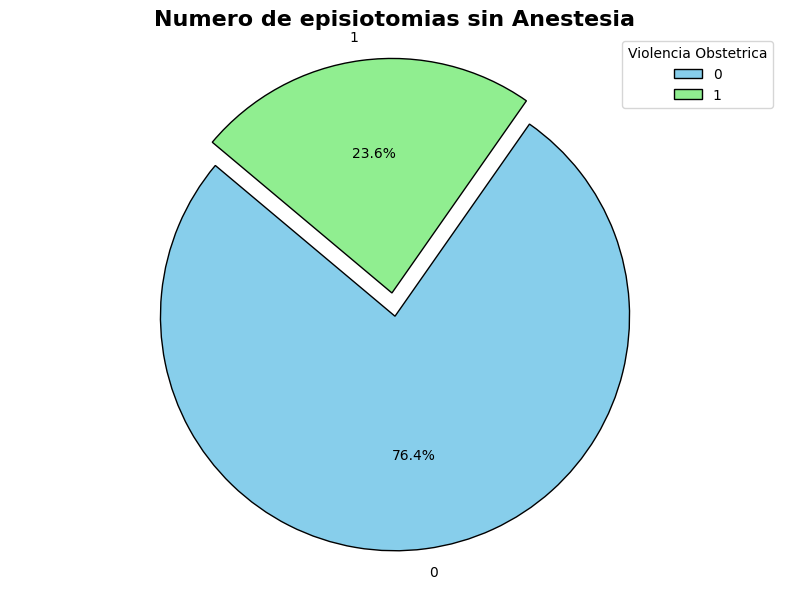

In [177]:
import matplotlib.pyplot as plt
colors = ['skyblue', 'lightgreen']

# Calculate value counts for 'Violencia Obstetrica'
value_counts = episiotomy_df['Violencia Obstetrica'].value_counts()

# Define colors for the pie chart segments
colors = ['skyblue', 'lightgreen']

# Explode a segment (optional, set to None if not needed)
explode = (0.1, 0)  # Explode the first segment slightly

# Create a pie chart with enhanced styling
plt.figure(figsize=(8, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, wedgeprops={'edgecolor': 'black'})
plt.title('Numero de episiotomias sin Anestesia', fontsize=16, fontweight='bold')  # Set title with larger font and bold
plt.axis('equal')  # Ensure the pie chart is circular
plt.legend(title='Violencia Obstetrica', loc='upper right', fontsize=10)  # Add a legend with adjusted properties
plt.tight_layout()
plt.show()

### Relacion entre la edad Materna y Episiotomias

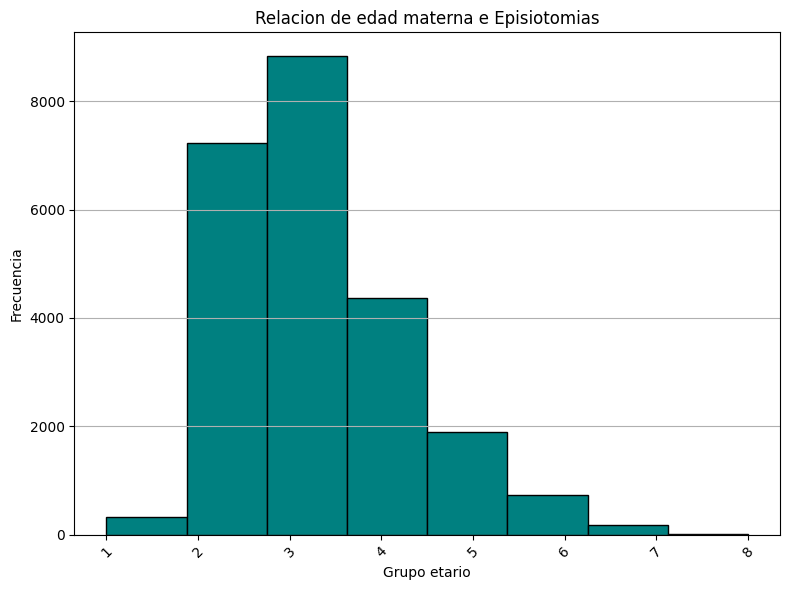

In [190]:

# Calculate value counts for 'Grupo de edad materna'
value_counts = episiotomy_df['Grupo de edad materna'].value_counts()

# Create a histogram
plt.figure(figsize=(8, 6))  # Set the size of the plot (optional)
plt.hist(episiotomy_df['Grupo de edad materna'], bins=len(value_counts), color='teal', edgecolor='black')
plt.title('Relacion de edad materna e Episiotomias')  # Set the title of the plot
plt.xlabel('Grupo etario')  # Set label for x-axis
plt.ylabel('Frecuencia')  # Set label for y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines along y-axis
plt.tight_layout()  # Adjust layout (optional)
plt.show()

<Figure size 1200x800 with 0 Axes>

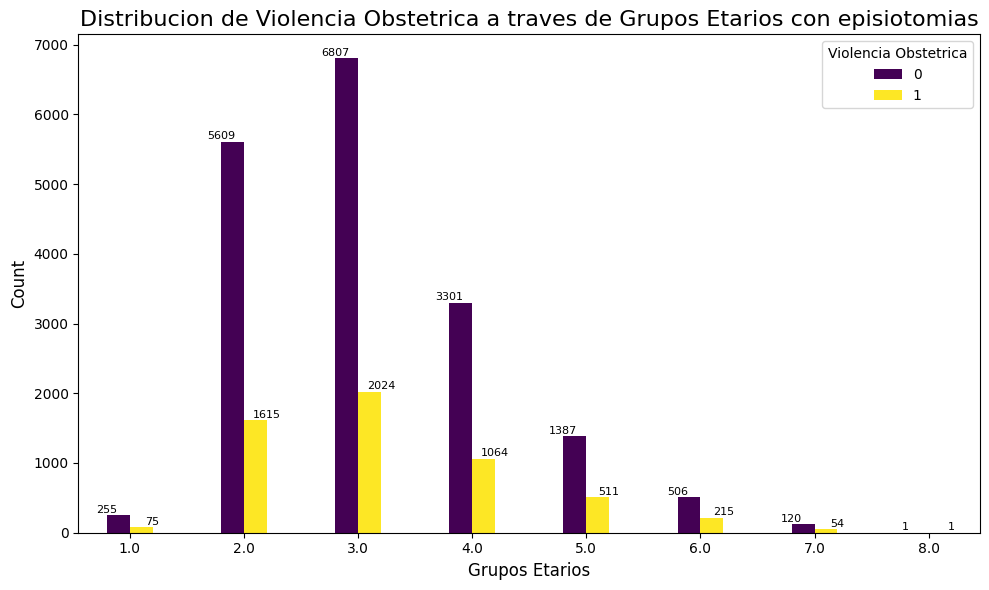

In [191]:

age_violence_counts = episiotomy_df.groupby('Grupo de edad materna')['Violencia Obstetrica'].value_counts().unstack().fillna(0)

# Plot a grouped bar plot
plt.figure(figsize=(12, 8))  # Set the size of the plot
age_violence_counts.plot(kind='bar', width=0.4, figsize=(10, 6), colormap='viridis')

# Display percentages on the bars
for i in range(len(age_violence_counts)):
    total = sum(age_violence_counts.iloc[i])
    for j in range(len(age_violence_counts.columns)):
        plt.text(i + (j - 0.5) * 0.4, age_violence_counts.iloc[i, j] + 5,
                 f"{age_violence_counts.iloc[i, j]}",
                 ha='center', va='bottom', color='black', fontsize=8)

plt.title('Distribucion de Violencia Obstetrica a traves de Grupos Etarios con episiotomias', fontsize=16)  # Increase title font size
plt.xlabel('Grupos Etarios', fontsize=12)  # Increase x-axis label font size
plt.ylabel('Count', fontsize=12)  # Increase y-axis label font size
plt.legend(title='Violencia Obstetrica', fontsize=10)  # Increase legend font size
plt.xticks(rotation=0, fontsize=10)  # Increase x-axis tick label font size
plt.yticks(fontsize=10)  # Increase y-axis tick label font size
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

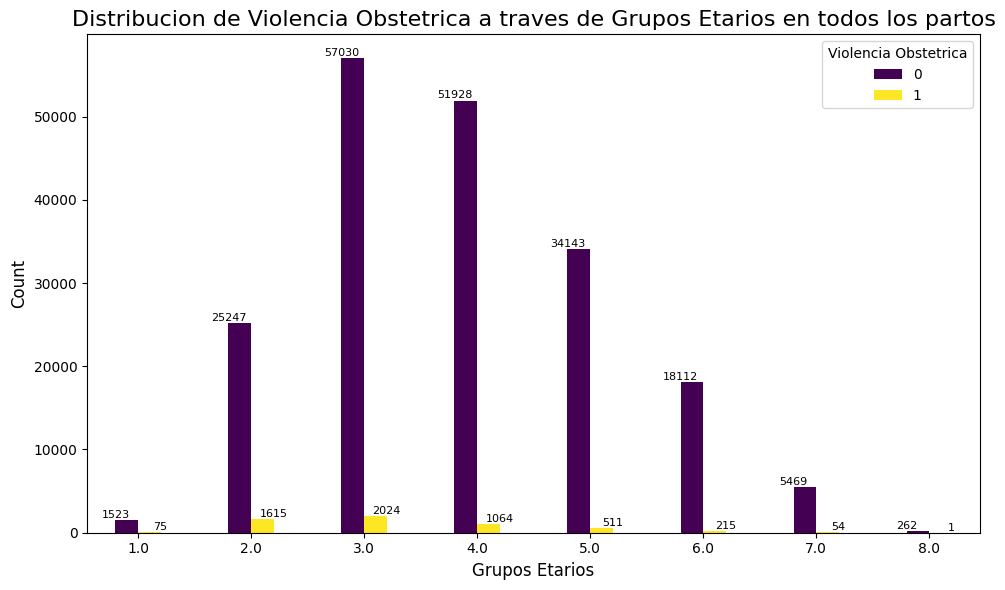

In [189]:
age_violence_counts = data.groupby('Grupo de edad materna')['Violencia Obstetrica'].value_counts().unstack().fillna(0)

# Plot a grouped bar plot
plt.figure(figsize=(12, 8))  # Set the size of the plot
age_violence_counts.plot(kind='bar', width=0.4, figsize=(10, 6), colormap='viridis')

# Display percentages on the bars
for i in range(len(age_violence_counts)):
    total = sum(age_violence_counts.iloc[i])
    for j in range(len(age_violence_counts.columns)):
        plt.text(i + (j - 0.5) * 0.4, age_violence_counts.iloc[i, j] + 5,
                 f"{age_violence_counts.iloc[i, j]}",
                 ha='center', va='bottom', color='black', fontsize=8)

plt.title('Distribucion de Violencia Obstetrica a traves de Grupos Etarios en todos los partos', fontsize=16)  # Increase title font size
plt.xlabel('Grupos Etarios', fontsize=12)  # Increase x-axis label font size
plt.ylabel('Count', fontsize=12)  # Increase y-axis label font size
plt.legend(title='Violencia Obstetrica', fontsize=10)  # Increase legend font size
plt.xticks(rotation=0, fontsize=10)  # Increase x-axis tick label font size
plt.yticks(fontsize=10)  # Increase y-axis tick label font size
plt.tight_layout()
plt.show()

In [181]:
episiotomy_df['Estudios'].value_counts()

C    17230
B     3739
D     1401
A      102
Name: Estudios, dtype: int64

In [182]:
mapping_dict = {'A': 1, 'B': 2, 'C': 3, 'D': 4}

episiotomy_df['Estudios'] = episiotomy_df['Estudios'].replace(mapping_dict)

<ipython-input-182-cd17fc4f1dac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  episiotomy_df['Estudios'] = episiotomy_df['Estudios'].replace(mapping_dict)


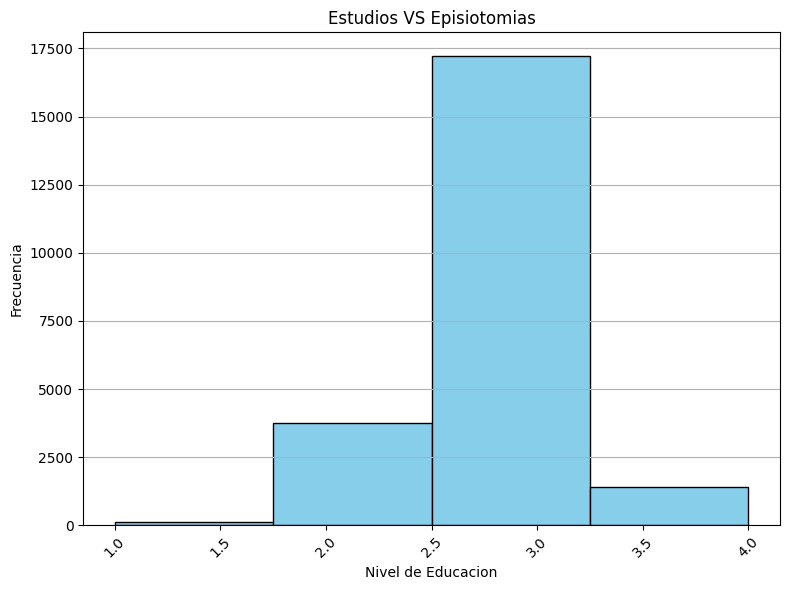

In [183]:
# Calculate value counts for 'Grupo de edad materna'
value_counts = episiotomy_df['Estudios'].value_counts()

# Create a histogram
plt.figure(figsize=(8, 6))  # Set the size of the plot (optional)
plt.hist(episiotomy_df['Estudios'], bins=len(value_counts), color='skyblue', edgecolor='black')
plt.title('Estudios VS Episiotomias')  # Set the title of the plot
plt.xlabel('Nivel de Educacion')  # Set label for x-axis
plt.ylabel('Frecuencia')  # Set label for y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines along y-axis
plt.tight_layout()  # Adjust layout (optional)
plt.show()

In [184]:
non_episiotomy_df = data[data['Episiotomía'] == 0]

mapping_dict = {'A': 1, 'B': 2, 'C': 3, 'D': 4}

non_episiotomy_df['Estudios'] = non_episiotomy_df['Estudios'].replace(mapping_dict)

<ipython-input-184-ac733634ce7d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_episiotomy_df['Estudios'] = non_episiotomy_df['Estudios'].replace(mapping_dict)


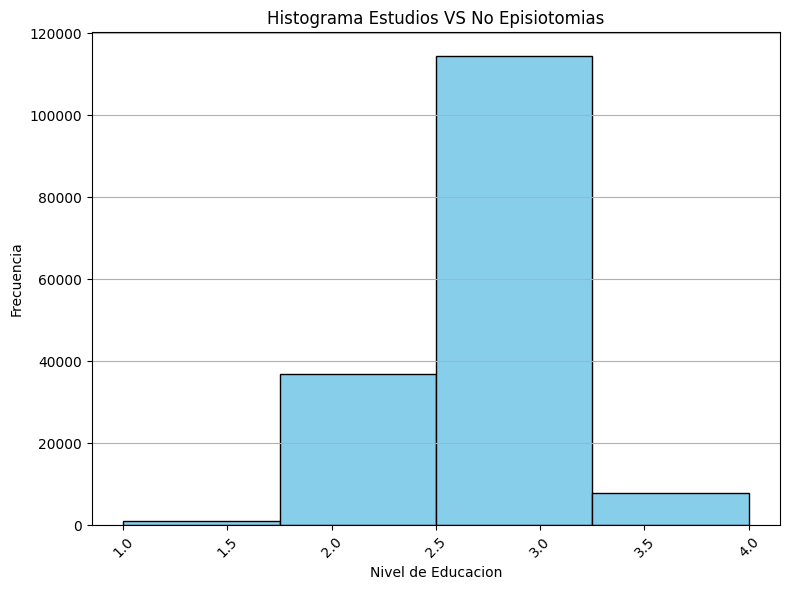

In [185]:
# Calculate value counts for 'Grupo de edad materna'
value_counts = non_episiotomy_df['Estudios'].value_counts()

# Create a histogram
plt.figure(figsize=(8, 6))  # Set the size of the plot (optional)
plt.hist(non_episiotomy_df['Estudios'], bins=len(value_counts), color='skyblue', edgecolor='black')
plt.title('Histograma Estudios VS No Episiotomias')  # Set the title of the plot
plt.xlabel('Nivel de Educacion')  # Set label for x-axis
plt.ylabel('Frecuencia')  # Set label for y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Add gridlines along y-axis
plt.tight_layout()  # Adjust layout (optional)
plt.show()

In [192]:
episiotomy_df.shape

(23552, 19)